In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte

%matplotlib inline

In [101]:
m_e = 9.109*(10**-28)
q = 4.803*(10**-10)
h=6.626*(10**-27)
c = 2.99 * (10**10)
k = 1.381 * (10**-16)
m_h = 1.67 * (10**-27) *1000


In [19]:
def frequency_cutoff(n):

    return 2 * (np.pi**2) * m_e * (q**4) / ((h**3) * (n**2))

In [70]:
def cross_section_n(v,n,T):
    exp_x = -2 * (1 - (1/(n**2))) * (np.pi**2) * m_e * (q**4) / ((h**2) * k * T)
    return 64 * (np.pi**4) * m_e * (q**10) / (3 * np.sqrt(3) * (h**6) * (v**3) * (n**3)) * np.exp(exp_x)

In [73]:
cross_section(10**14,5800)

3.3791087614256843e-16

In [92]:
def cross_section(v,T):
    sig = 0
    for i in range(1,50):
        if v > frequency_cutoff(i):
            sig += cross_section_n(v,i,T)
    return sig

9.521725515026714e-17
4.906681706050867e-17
2.8859511245997545e-17
1.853870403686879e-17
1.26790816337635e-17
9.086586020937222e-18
6.752059847101202e-18
5.1642879315222366e-18
4.044120276561484e-18
3.2297099201352724e-18
2.6225118190765807e-18
2.160029660215439e-18
1.8012412265740713e-18
1.5184147436800134e-18
1.2923187082606318e-18
1.1093156284505731e-18
9.595427444949986e-19
8.357414252921676e-19
7.324853601630812e-19
6.45660489240938e-19
5.721076450417893e-19
5.0937262395771285e-19
4.555285669915635e-19
4.0904787001090157e-19
3.6870856682599155e-19
3.3352505983928516e-19
3.0269628054345336e-19
2.755664840720982e-19
2.515953078838131e-19
2.3033469677701893e-19
2.1141096815292428e-19
1.9451076143252782e-19
1.7936994823319773e-19
1.6576481800825652e-19
1.5350502600063324e-19
1.424279160278952e-19
1.3239392318472557e-19
1.2328283032112314e-19
1.1499070366089172e-19
1.0742737179522691e-19
1.0051434183307873e-19
9.41830691041352e-20
8.837351423157745e-20
8.303293489603536e-20
7.811487014

2.5340834229862596e-16

Text(0.5, 1.0, 'Frequency vs Ionazation Crosssection')

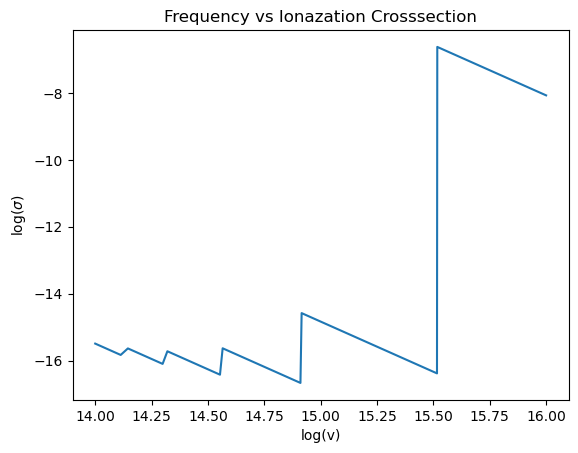

In [93]:
x = np.linspace(10**14,10**16,1000)
y = []
    
for i in range(len(x)):
    
    y.append(cross_section(x[i],5800))

plt.plot(np.log10(x),np.log10(y))
plt.ylabel('log($\sigma$)')
plt.xlabel('log(v)')
plt.title('Frequency vs Ionazation Crosssection')

In [99]:
def kappa(sig):
    print(sig/m_h)
    return sig/m_h


In [100]:
def black_body(v,T):
    return 2 * h * (v**3) / ((c**2)*(np.exp(h*v/(k*T))-1))
    

In [104]:
def top_integrand(v,T):
    print(black_body(v,T)/kappa(cross_section(v,T)))
    return black_body(v,T)/kappa(cross_section(v,T))

In [105]:
inte.quad(top_integrand,0,np.inf, args=5800)

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


C:\Users\Lara\AppData\Local\Temp\ipykernel_6884\1225962740.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  print(black_body(v,T)/kappa(cross_section(v,T)))
C:\Users\Lara\AppData\Local\Temp\ipykernel_6884\1225962740.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return black_body(v,T)/kappa(cross_section(v,T))
C:\Users\Lara\AppData\Local\Temp\ipykernel_6884\3210328700.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  inte.quad(top_integrand,0,np.inf, args=5800)


(nan, nan)